In [1]:
import re
import pathlib
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')    # 使用样式
plt.rcParams['font.sans-serif'] = ['SimHei']     # 显示中文
plt.rcParams['axes.unicode_minus'] = False     # 显示负号


path_record = pathlib.Path('./2021年读书小结.md')

## 数据准备

In [2]:
with open(path_record, encoding='utf-8') as f:
    content = f.read()


In [3]:
names = re.findall(r'### \[(.*?)\]\(', content)
links = re.findall(r'### .*?\((.*?)\)', content)
stars = [len(i) for i in re.findall(r'<font color.*?>(.*?)</font>', content)]

In [4]:
line1 = re.findall(r'\n> (.*?)\n>', content)
line2 = re.findall(r'\n> .*?\n> (.*?)\n', content)

# writers = [i.split(' / ')[0] for i in line1]
# publishers = [i.split(' / ')[1] for i in line1]
# publish_times = [i.split(' / ')[2] for i in line1]
# prices = [i.split(' / ')[3].replace('元', '') for i in line1]

read_dates = [i.split(' ')[0] for i in line2]
labels = [re.search(r'标签: (.*)', i).group(1).split() for i in line2]

In [5]:

df = pd.DataFrame({'书名': names, '评分': stars, '读完时间': read_dates, '标签': labels, '备注': line1, '豆瓣链接': links})
df['读完时间'] = pd.to_datetime(df['读完时间'])
df['月份'] = df['读完时间'].dt.month.astype(str) + '月'
df['月份'] = pd.Categorical(df['月份'], categories=['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月'])
df = df.sort_values('读完时间')
df['累计数量'] = 1
df['累计数量'] = df['累计数量'].cumsum()
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量
50,剑来1：少年起微末,3,2021-01-11,"[网文, 小说, 玄幻, 网络小说]",烽火戏诸侯 / 浙江文艺出版社 / 2020-4 / 40.00元,https://book.douban.com/subject/35022388/,1月,1
49,剑来2：忽为远行客,2,2021-01-12,"[玄幻, 网络小说, 网文]",烽火戏诸侯 / 浙江文艺出版社 / 2020-4 / 45.00元,https://book.douban.com/subject/35022398/,1月,2
47,許仙志03,4,2021-01-28,"[玄幻, 仙侠, 网文]",,https://book.douban.com/subject/33280855/,1月,3
48,許仙志01,3,2021-01-28,"[小说, 仙侠, 玄幻, 网文]",說夢者 / 說頻文化,https://book.douban.com/subject/30154382/,1月,4
46,飞行家,4,2021-02-18,"[小说, 文学, 中国]",双雪涛 / 广西师范大学出版社 / 2017-8 / 45.00元,https://book.douban.com/subject/27116235/,2月,5
45,文学课：如何轻松理解伟大作品,3,2021-02-23,"[导读, 文学, 文学理论]",[美] 托马斯·福斯特 / 张积模、江美娜 / 后浪丨北京联合出版公司 / 2018-10 ...,https://book.douban.com/subject/30270831/,2月,6
44,許仙志06,3,2021-02-23,"[玄幻, 小说]",,https://book.douban.com/subject/32740373/,2月,7
43,白话机器学习算法,3,2021-02-28,"[入门, 人工智能, 机器学习, 计算机]",[新加坡] 黄莉婷、[新加坡] 苏川集 / 武传海 / 人民邮电出版社 / 2019-2 /...,https://book.douban.com/subject/30442187/,2月,8
42,文森特与凡·高：星空中的月亮,3,2021-03-04,"[绘本, 图像小说, 漫画]",[塞尔维亚] 格拉迪米尔·斯穆贾 编绘 / 黄洁华 / 湖南美术出版社 / 2017-12 ...,https://book.douban.com/subject/27194696/,3月,9
41,Python数据科学入门,2,2021-03-09,"[Python, 数据分析, 数据科学]",[俄] Dmitry Zinoviev / 熊子源 / 人民邮电出版社 / 2017-11 ...,https://book.douban.com/subject/27179941/,3月,10


In [6]:
df.columns

Index(['书名', '评分', '读完时间', '标签', '备注', '豆瓣链接', '月份', '累计数量'], dtype='object')

In [7]:
df['作者'] = df['备注'].map(lambda x: x.split(' / ')[0])
df['评分'] = df['评分'].map(lambda x: '★' * x)
df1 = df[['书名', '作者', '评分', '读完时间']]
df1

,书名,作者,评分,读完时间
50,剑来1：少年起微末,烽火戏诸侯,★★★,2021-01-11
49,剑来2：忽为远行客,烽火戏诸侯,★★,2021-01-12
47,許仙志03,,★★★★,2021-01-28
48,許仙志01,說夢者,★★★,2021-01-28
46,飞行家,双雪涛,★★★★,2021-02-18
45,文学课：如何轻松理解伟大作品,[美] 托马斯·福斯特,★★★,2021-02-23
44,許仙志06,,★★★,2021-02-23
43,白话机器学习算法,[新加坡] 黄莉婷、[新加坡] 苏川集,★★★,2021-02-28
42,文森特与凡·高：星空中的月亮,[塞尔维亚] 格拉迪米尔·斯穆贾 编绘,★★★,2021-03-04
41,Python数据科学入门,[俄] Dmitry Zinoviev,★★,2021-03-09


In [8]:
df1.to_excel('./2021年读书小结2.xlsx', index=False)

In [9]:
# df.to_excel('./2021年读书小结.xlsx', index=False)

## 配色

In [10]:
import plotly.express as px

px.colors.sequential.swatches()

In [11]:
px.colors.sequential.matter

['rgb(253, 237, 176)',
 'rgb(250, 205, 145)',
 'rgb(246, 173, 119)',
 'rgb(240, 142, 98)',
 'rgb(231, 109, 84)',
 'rgb(216, 80, 83)',
 'rgb(195, 56, 90)',
 'rgb(168, 40, 96)',
 'rgb(138, 29, 99)',
 'rgb(107, 24, 93)',
 'rgb(76, 21, 80)',
 'rgb(47, 15, 61)']

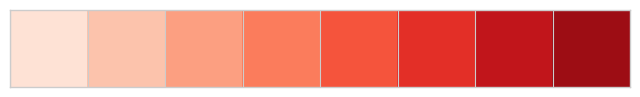

In [12]:
sns.palplot(sns.color_palette("Reds", 8))

## 可视化

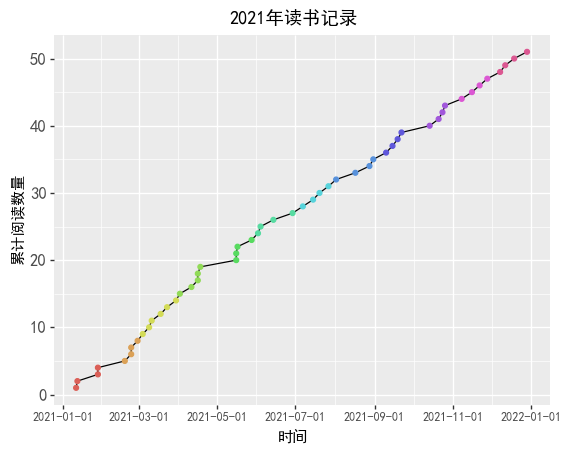

<ggplot: (86133206983)>

In [13]:
(ggplot(df, aes(x='读完时间', y='累计数量'))
    + geom_line()
    + geom_point(aes(color='月份'))
    + labs(x='时间', y='累计阅读数量', title='2021年读书记录')
    + guides(color=False)
    + theme(text=element_text(family="SimHei"),
            # axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)

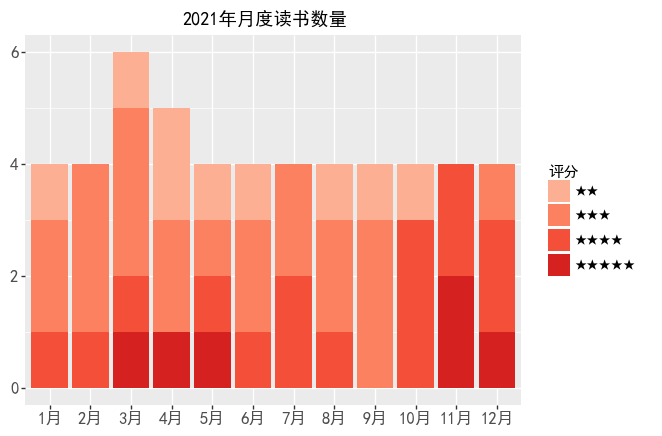

<ggplot: (86133287641)>

In [14]:
colors = sns.color_palette("Reds").as_hex()

(ggplot(df, aes(x='月份'))
    # + geom_bar(fill='lightblue')
    + geom_bar(aes(fill='factor(评分)', group='factor(评分)'))
    + scale_fill_manual(values=colors[1:])
    + labs(x='', y='', title='2021年月度读书数量', fill='评分')
    + theme(text=element_text(family="SimHei"),
            axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)


In [22]:
df_score = df.groupby('评分', as_index=False).count()[['评分', '书名']]
df_score['评分'] = df_score['评分'].map(len).astype(str) + '分'
df_score.loc[-1] = ["1分", 0]
df_score['评分'] = pd.Categorical(df_score['评分'], categories=reversed(['1分', '2分', '3分', '4分', '5分']))
df_score['x'] = 1
df_score

,评分,书名,x
0,2分,9,1
1,3分,21,1
2,4分,15,1
3,5分,6,1
-1,1分,0,1


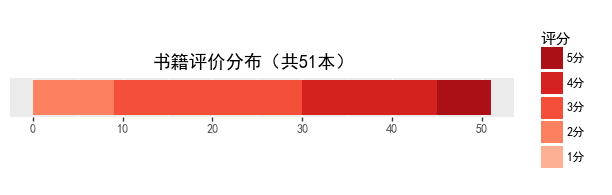

<ggplot: (86133429727)>

In [23]:
colors_r = sns.color_palette("Reds_r").as_hex()

(ggplot(df_score)
    + geom_col(aes(x='x', y='书名', fill='评分'))
    # + geom_text(aes(label='书名'), )
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title='书籍评价分布（共51本）')
    + scale_x_continuous(breaks=None)
    # + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

<AxesSubplot:ylabel='书名'>

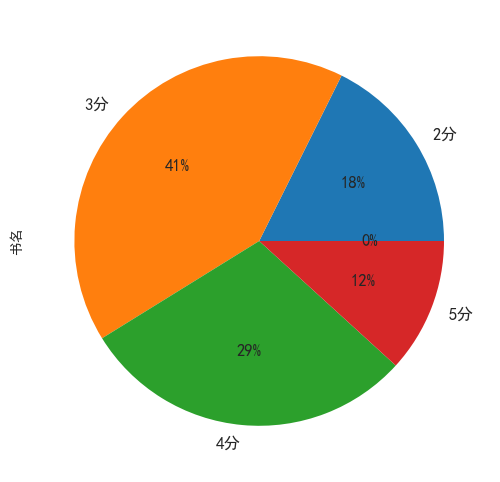

In [24]:
df_score.set_index('评分').plot.pie(y='书名', figsize=(6, 6), autopct='%1.0f%%', fontsize=12, legend=False)

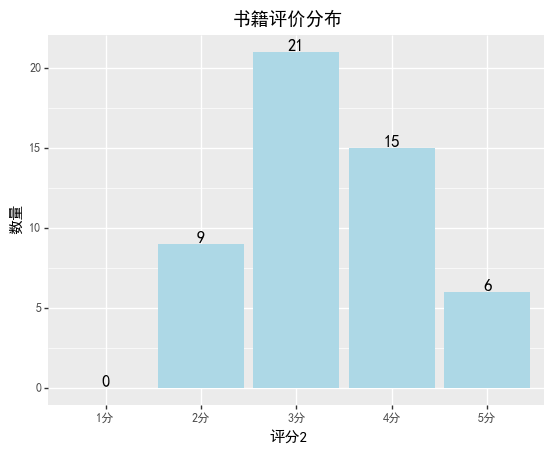

<ggplot: (86133661437)>

In [25]:
df_score['评分2'] = pd.Categorical(df_score['评分'], categories=['1分', '2分', '3分', '4分', '5分'])

(ggplot(df_score, aes(x='评分2', y='书名'))
    + geom_col(fill='lightblue')
    + geom_text(aes(label='书名'), size=12, va='bottom')
    + ggtitle('书籍评价分布')
    + ylab('数量')
    + theme(text=element_text(family="SimHei"))
)

In [26]:
df.query('评分==5')['书名']

Series([], Name: 书名, dtype: object)

In [27]:
import pyecharts.options as opts
from pyecharts.charts import WordCloud


s_label = df['标签'].explode().value_counts()
words = [(label, num) for label, num in s_label.items()]

wc = (
    WordCloud()
    .add("", words)
)

wc.render_notebook()

In [28]:
15/51

0.29411764705882354